# Heart Disease Application
<p>Many people suffer from heart disease and don't know, in our project, a simple website will be created that will help people to know if they have heart disease or not by some information.<br> In this notebook we will build an automatic heart disease predictor using machine learning techniques.</p>
<p>The structure of this notebook is as follows:</p>
<ul>
    <li>First, we will start off by loading and viewing the dataset.</li>
    <li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
    <li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
    <li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
    <li>then, we will build a machine learning model that can predict if a person have heart disease or not.</li>
    <li>finally, we will deploy our model</li>
</ul>
<p>First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>
<p>we'll use the <a href='https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download'>Personal Key Indicators of Heart Disease</a> from kaggle</p>
<img src="heart.jpg" width=800px height=200px alt="heart pain photo">

# 1- Import Main Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2- Load data

In [3]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df[df['HeartDisease']=='Yes']

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6.0,Yes,No,No
319767,Yes,36.21,Yes,No,No,0.0,0.0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8.0,No,No,No
319781,Yes,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No


# Insert Data Into Sqlite database to make analysis with sql in another notebook 

In [5]:
# import sqlite3

# conn = sqlite3.Connection('HeartDisease.db')

# for i,j in df.iterrows():
#     sql = "INSERT INTO Data(HeartDisease,BMI,Smoking,AlcohoDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer)values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)"
#     data=[j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8],j[9],j[10],j[11],j[12],j[13],j[14],j[15],j[16],j[17]]
#     conn.execute(sql, data)
# conn.commit()
# conn.close()

# - Feature Engineering

Convert BMI Values to Categories and drop BMI Column
<img src='bodymass.png' alt='BMI Categories Photo'>

In [6]:
#Function used to transform BMI Values to categories
def transform_bmi(value):
    if value<16:
        return "Severe Thinness"
    elif value>=16 and value<17:
        return "Moderate Thinness"
    elif value>=17 and value<18.5:
        return "Mild Thinness"
    elif value>=18.5 and value<25:
        return "Normal"
    elif value>=25 and value<30:
        return "OverWeight"
    elif value>=30 and value<35:
        return "Obese Class I"
    elif value>=35 and value<40:
        return "Obese Class II"
    elif value>=40 :
        return "Obese Class III"

In [7]:
df["BMICategory"] = df["BMI"].apply(transform_bmi)

In [8]:
df["BMICategory"].value_counts(ascending= False)

OverWeight           114512
Normal                97331
Obese Class I         61345
Obese Class II        25112
Obese Class III       16385
Mild Thinness          3529
Moderate Thinness       890
Severe Thinness         691
Name: BMICategory, dtype: int64

In [9]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICategory
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,Moderate Thinness
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Normal


# 3- Explore Data

In [10]:
print(f"Rows number is {df.shape[0]}")
print(f"columns number is {df.shape[1]}")

Rows number is 319795
columns number is 19


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### - convert "SleepTime", "PhysicalHealth" and "MentalHealth" dtypes to category

In [12]:
df['SleepTime'] = df['SleepTime'].astype('object')
df['PhysicalHealth'] = df['PhysicalHealth'].astype('object')
df['MentalHealth'] = df['MentalHealth'].astype('object')

use describe Function to show some describe about data 
<br>
<span style= "color:red">Hint:</span>describe function isn't used only for numeric data, also can describe categorical data

In [13]:
df.describe(include='object').transpose()

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
PhysicalHealth,319795.0,31.0,0.0,226589.0
MentalHealth,319795.0,31.0,0.0,205401.0
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212


In [14]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth       object
MentalHealth         object
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime            object
Asthma               object
KidneyDisease        object
SkinCancer           object
BMICategory          object
dtype: object

# 4- Data Cleaning

### - Check null values

In [15]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
BMICategory         0
dtype: int64

<b>we can see from above cell, no null values</b>

### - here we see wrong values that should be replaced

In [16]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

<b>From above we need to replace "No, borderline diabetes" with "No" and "Yes (during pregnancy)" with "Yes"</b>

In [17]:
# Replacement 
df['Diabetic'] = df['Diabetic'].replace('No, borderline diabetes','No')
df['Diabetic'] = df['Diabetic'].replace('Yes (during pregnancy)','Yes')

In [18]:
df['Diabetic'].value_counts()

No     276434
Yes     43361
Name: Diabetic, dtype: int64

### - Check Duplicates

In [19]:
df[df.duplicated()].shape

(18491, 19)

In [20]:
# drop dublicates
df.drop_duplicates(inplace=True)
df.shape

(301304, 19)

In [21]:
sum(df.duplicated())

0

### - Detecting outliers

In [22]:
df.describe()

,BMI
count,301304.000000
mean,28.443504
std,6.470979
min,12.020000
25%,24.030000
50%,27.410000
75%,31.660000
max,94.850000


In [23]:
# this function takes column as a parameter and calculate min and max whiskers then return data frame without outliers
def detect_outlier(col):
    IQR = df[col].quantile(.75) - df[col].quantile(.25)
    max_whiskers = df[col].quantile(.75) + (IQR*1.5)
    min_whiskers = df[col].quantile(.25) - (IQR*1.5)
    return df[(df[col]<max_whiskers) & (df[col]>min_whiskers)]

In [24]:
df = detect_outlier('BMI')

# 5- Visualization

# - plot categories coulmns

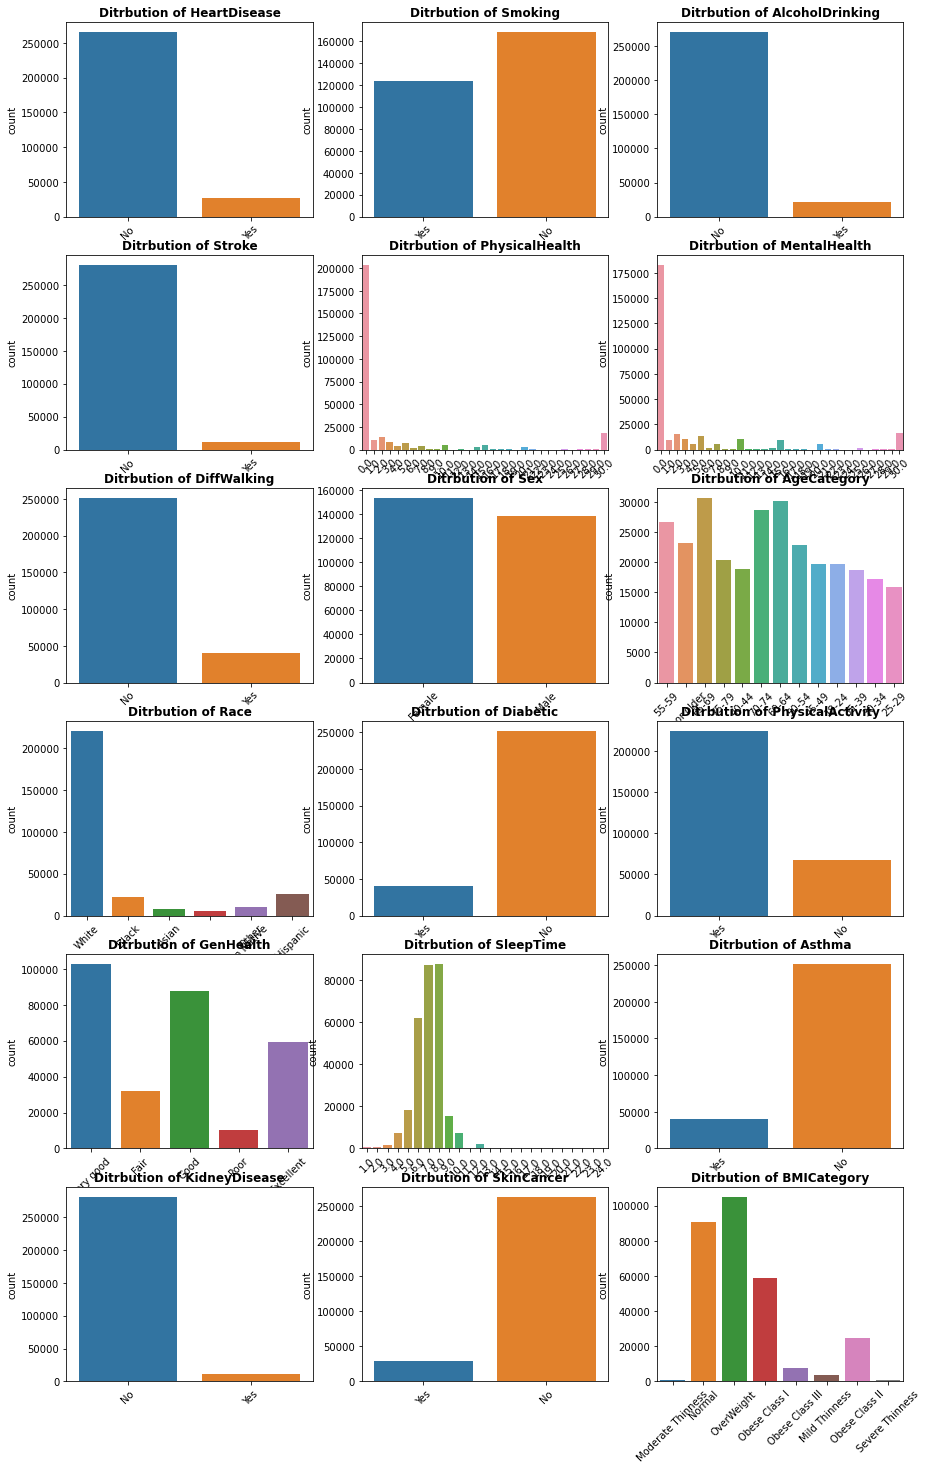

In [25]:
i=1
plt.figure(figsize=(15,25))
for col in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,i)
    plt.xticks(rotation=45)
    sns.countplot(x=col,data=df)
    plt.title(f"Ditrbution of {col}",weight='bold')
    plt.xlabel('')
    i+=1

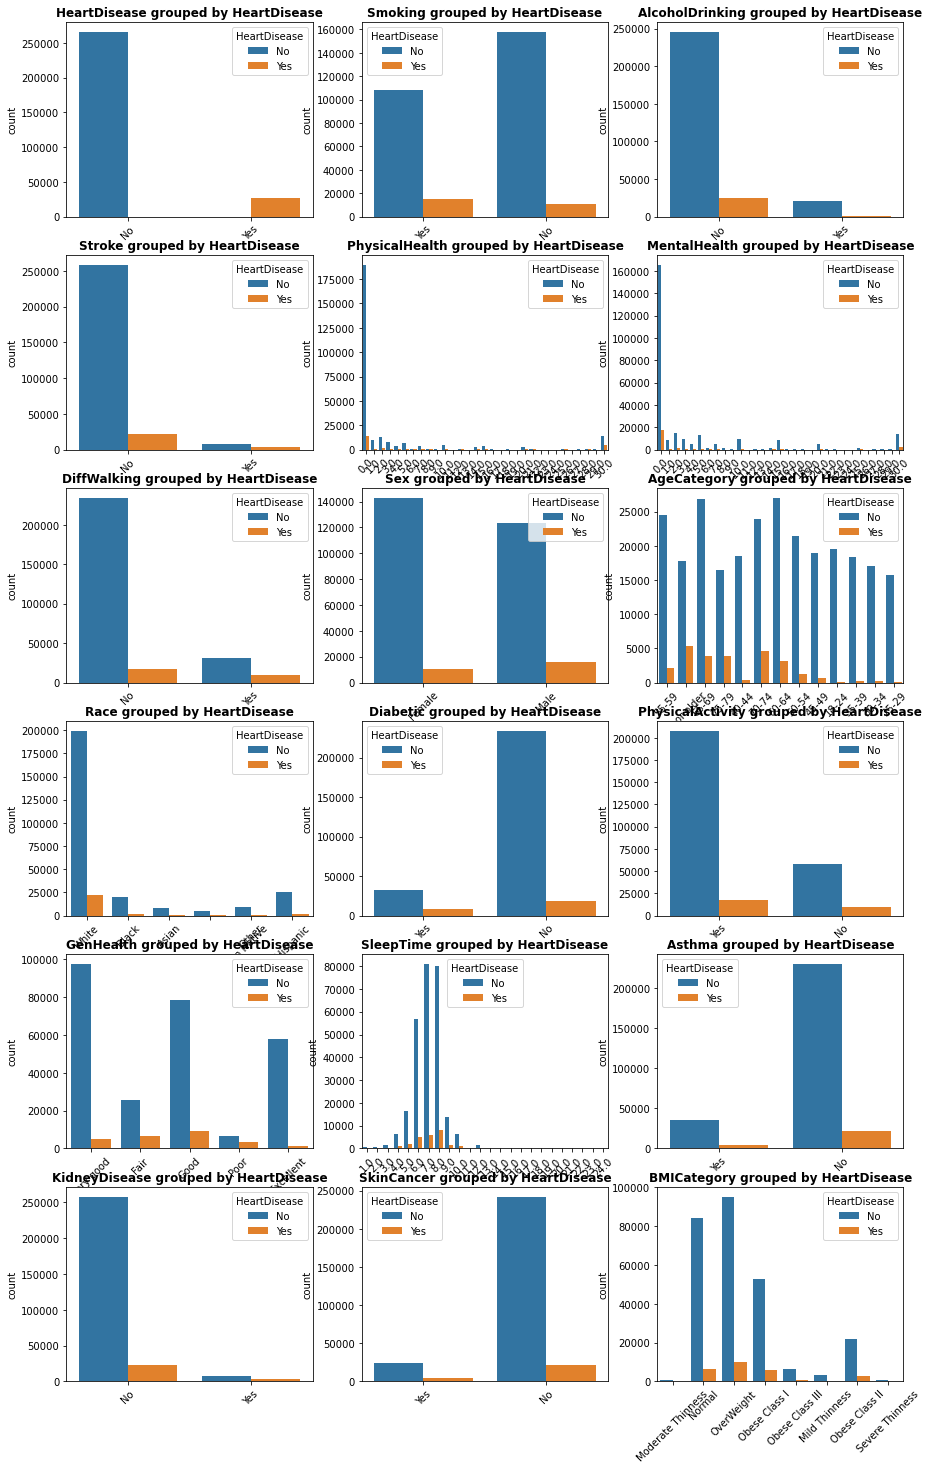

In [26]:
i=1
plt.figure(figsize=(15,25))
for col in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,i)
    plt.xticks(rotation=45)
    sns.countplot(x=col,data=df,hue='HeartDisease')
    plt.title(f"{col} grouped by HeartDisease",fontweight='bold')
    plt.xlabel(' ')
    i+=1

<p><b>we can see from above charts: </b></p>
<ul>
    <li>number of people they smoking and have heart disease is more than they don't</li>
    <li>number of people they don't drink alcohol and have heart disease is more than they don't</li>
    <li>males have heart disease more than females</li>
    <li>people who have difficulty walking can have heart disease more than don't</li>
    <li>people who have stroke can have heart disease more than don't</li>
    <li>people who have diabetic can have heart disease more than don't</li>
    <li>white people have heart disease more than others</li>
    <li>people older than 40 years old can have heart disease more than others</li>
    <li>Gen health for most people is very good and all can have heart disease in equal proportions</li>
    <li>People who are not physically active can get heart disease more than others</li>
</ul>

# - Plot numeric column

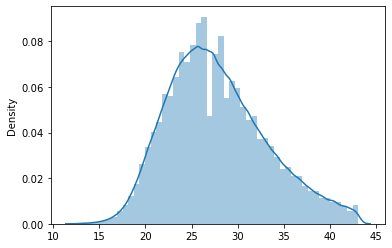

In [27]:
sns.distplot(x=df['BMI'],hist=True)
plt.show()

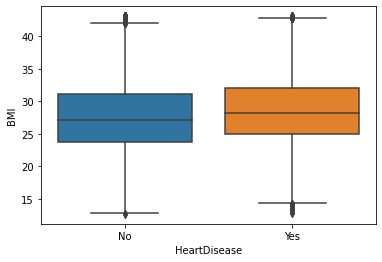

In [28]:
sns.boxplot(x='HeartDisease', y='BMI', data=df)
plt.show()

# 6- Data Preprocessing

In [29]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICategory
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,Moderate Thinness
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Normal
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,OverWeight
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,Normal
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,Normal


In [30]:
df.shape

(292415, 19)

### split dataset in features and target variable

In [31]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

### using OrdinalEncoder to transform 'GenHealth', 'AgeCategory' and 'BMICategory' because these categories are ordianl 

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
Genhealth_categories_order = ['Poor','Fair','Good','Very good','Excellent']
encoder = OrdinalEncoder(categories=[Genhealth_categories_order])
encoder.fit(X[['GenHealth']])
X['GenHealth'] = encoder.transform(X[['GenHealth']])

In [34]:
X['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [35]:
Age_categories_order=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']
encoder = OrdinalEncoder(categories=[Age_categories_order])
encoder.fit(X[['AgeCategory']])
X['AgeCategory'] = encoder.transform(X[['AgeCategory']])

In [36]:
X['BMICategory'].unique()

array(['Moderate Thinness', 'Normal', 'OverWeight', 'Obese Class I',
       'Obese Class III', 'Mild Thinness', 'Obese Class II',
       'Severe Thinness'], dtype=object)

In [37]:
BMI_Categories_order=['Severe Thinness','Moderate Thinness','Mild Thinness','Normal','OverWeight','Obese Class I','Obese Class II','Obese Class III']
encoder = OrdinalEncoder(categories=[BMI_Categories_order])
encoder.fit(X[['BMICategory']])
X['BMICategory'] = encoder.transform(X[['BMICategory']])

In [38]:
X['AgeCategory'] = X['AgeCategory'].astype('object')
X['GenHealth'] = X['GenHealth'].astype('object')
X['BMICategory'] = X['BMICategory'].astype('object')
X.dtypes

BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth       object
MentalHealth         object
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime            object
Asthma               object
KidneyDisease        object
SkinCancer           object
BMICategory          object
dtype: object

In [39]:
X.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'BMICategory'],
      dtype='object')

### using get dummies to encode nominal categories

In [40]:
nominal_categories = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 
                      'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [41]:
for col in nominal_categories:
    X = pd.get_dummies(data=X, columns=[col],drop_first=True)

In [42]:
X.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,BMICategory,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,7.0,3.0,5.0,1.0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1
1,20.34,0.0,0.0,12.0,3.0,7.0,3.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,26.58,20.0,30.0,9.0,1.0,8.0,4.0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0
3,24.21,0.0,0.0,11.0,2.0,6.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,4.0,3.0,8.0,3.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


# Import Libraries

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize, Normalizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,fbeta_score

# Split data to train and test 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)            

In [45]:
#data before balancing
print(sum(y_train=='No'))
print(sum(y_train=='Yes'))

178341
17577


# We can see data is imbalanced so we will use oversampling techinques to balance data

# Using "RandomOverSampler" oversampling technique to resample data

In [44]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [45]:
oversample=RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [46]:
#data after balancing
print(sum(y_train=='No'))
print(sum(y_train=='Yes'))

178341
178341


In [46]:
scaler =StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression 

In [48]:
logreg = LogisticRegression(C=100, solver='newton-cg')

# params={'C':[100, 1000],'solver':['newton-cg', 'lbfgs', 'liblinear']}
# logreg_cv = GridSearchCV(logreg, param_grid=params, scoring='f1', cv=10, n_jobs=-1)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7438055069069505
[[64952 22865]
 [ 1857  6823]]
              precision    recall  f1-score   support

          No       0.97      0.74      0.84     87817
         Yes       0.23      0.79      0.36      8680

    accuracy                           0.74     96497
   macro avg       0.60      0.76      0.60     96497
weighted avg       0.91      0.74      0.80     96497



## Decision Tree Classifier

In [49]:
dt_cv = DecisionTreeClassifier()

dt_cv.fit(X_train, y_train)

y_pred = dt_cv.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8588557157217322
[[80995  6822]
 [ 6798  1882]]
              precision    recall  f1-score   support

          No       0.92      0.92      0.92     87817
         Yes       0.22      0.22      0.22      8680

    accuracy                           0.86     96497
   macro avg       0.57      0.57      0.57     96497
weighted avg       0.86      0.86      0.86     96497



## Random Forest Classifier

In [50]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.888442127734541
[[83966  3851]
 [ 6914  1766]]
              precision    recall  f1-score   support

          No       0.92      0.96      0.94     87817
         Yes       0.31      0.20      0.25      8680

    accuracy                           0.89     96497
   macro avg       0.62      0.58      0.59     96497
weighted avg       0.87      0.89      0.88     96497



# From above we see the best model is Logistic Regression because we focus in recall not in accuracy
# Save Model

In [51]:
import joblib

In [52]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [53]:
joblib.dump(logreg,"LogisticRegression.pkl")

['LogisticRegression.pkl']

## Test model by my data 

In [54]:
mydata=[20,0,0,1,3,8,3,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0]
my_data_scaled=scaler.transform([mydata])

In [55]:
logreg.predict(my_data_scaled)

array(['No'], dtype=object)